Part 1 includes all data preprocessing steps. There are two methods to choose variables: literature review & SelectKBest.

# 1. Import libraries & data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# read file

df = pd.read_csv('original_data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27651 entries, 0 to 27650
Columns: 637 entries, URBRRL to POVRATTC_A
dtypes: float64(399), int64(237), object(1)
memory usage: 134.4+ MB


The original dataset has 637 columns, 27651 rows. After thorough literature review, I chose 27 predictors for our models, divided into Socio-demmographic (5), Physical Health (7), Hospitalization history (5), and Habits (10).

# 2. Select variables

In [ ]:
# Select column

df = df[['DIBEV_A','GESDIB_A',                                                     # output variables
         'AGEP_A','RACEALLP_A','SEX_A','EDUCP_A','BMICAT_A',                       # socio-demographic
         'PHSTAT_A','HYPEV_A','CHLEV_A','STREV_A','MIEV_A','CHDEV_A','COPDEV_A',   # physical health
         'LASTDR_A','URGNT12MTC_A','EMERG12MTC_A','HOSPONGT_A','RX12M_A',          # hospital record
         'MODFREQW_A','EQUIP_A','SMKEV_A','DRKLIFE_A','SODATP_A','SPORDRTP_A',     # habits
         'FRTDRTP_A','FRUITTP_A','SALADTP_A','SLPHOURS_A']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27651 entries, 0 to 27650
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DIBEV_A       27651 non-null  int64  
 1   GESDIB_A      15050 non-null  float64
 2   AGEP_A        27651 non-null  int64  
 3   RACEALLP_A    27651 non-null  int64  
 4   SEX_A         27651 non-null  int64  
 5   EDUCP_A       27651 non-null  int64  
 6   BMICAT_A      27651 non-null  int64  
 7   PHSTAT_A      27651 non-null  int64  
 8   HYPEV_A       27651 non-null  int64  
 9   CHLEV_A       27651 non-null  int64  
 10  STREV_A       27651 non-null  int64  
 11  MIEV_A        27651 non-null  int64  
 12  CHDEV_A       27651 non-null  int64  
 13  COPDEV_A      27651 non-null  int64  
 14  LASTDR_A      27651 non-null  int64  
 15  URGNT12MTC_A  27651 non-null  int64  
 16  EMERG12MTC_A  27651 non-null  int64  
 17  HOSPONGT_A    27651 non-null  int64  
 18  RX12M_A       27651 non-nu

# 3. Preprocess Output Variables

For output variables: If a person has diabetes only during pregnancy, I will consider them as No diabetes.

In [ ]:
# Output variables: If people answer Yes (1) in GESDIB_A column (pregnancy diabetes),
# change value in DIBEV_A to No (2)
df.loc[df['GESDIB_A'] == 1, 'DIBEV_A'] = 2

In [ ]:
# drop GESDIB_A column
df.drop(columns=['GESDIB_A'],inplace=True)

In [ ]:
# Only include people who answer (Yes or No)
df = df[(df['DIBEV_A']==1) | (df['DIBEV_A']==2)]

In [ ]:
# Change output variables name
df.rename(columns={'DIBEV_A':'Diabetes'},inplace=True)

<ipython-input-9-de1da51b9bd0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'DIBEV_A':'Diabetes'},inplace=True)


In [ ]:
# Change value to 0 = No, 1 = Yes
df.loc[df['Diabetes']==2,'Diabetes'] = 0

<ipython-input-10-93f8654124bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['Diabetes']==2,'Diabetes'] = 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27620 entries, 0 to 27650
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Diabetes      27620 non-null  int64
 1   AGEP_A        27620 non-null  int64
 2   RACEALLP_A    27620 non-null  int64
 3   SEX_A         27620 non-null  int64
 4   EDUCP_A       27620 non-null  int64
 5   BMICAT_A      27620 non-null  int64
 6   PHSTAT_A      27620 non-null  int64
 7   HYPEV_A       27620 non-null  int64
 8   CHLEV_A       27620 non-null  int64
 9   STREV_A       27620 non-null  int64
 10  MIEV_A        27620 non-null  int64
 11  CHDEV_A       27620 non-null  int64
 12  COPDEV_A      27620 non-null  int64
 13  LASTDR_A      27620 non-null  int64
 14  URGNT12MTC_A  27620 non-null  int64
 15  EMERG12MTC_A  27620 non-null  int64
 16  HOSPONGT_A    27620 non-null  int64
 17  RX12M_A       27620 non-null  int64
 18  MODFREQW_A    27620 non-null  int64
 19  EQUIP_A       27620 non-n

In [ ]:
# check missing values
df.isna().sum()

Diabetes        0
AGEP_A          0
RACEALLP_A      0
SEX_A           0
EDUCP_A         0
BMICAT_A        0
PHSTAT_A        0
HYPEV_A         0
CHLEV_A         0
STREV_A         0
MIEV_A          0
CHDEV_A         0
COPDEV_A        0
LASTDR_A        0
URGNT12MTC_A    0
EMERG12MTC_A    0
HOSPONGT_A      0
RX12M_A         0
MODFREQW_A      0
EQUIP_A         0
SMKEV_A         0
DRKLIFE_A       0
SODATP_A        0
SPORDRTP_A      0
FRTDRTP_A       0
FRUITTP_A       0
SALADTP_A       0
SLPHOURS_A      0
dtype: int64

# 4. Input Variables
We have a total of 31 input variables, mostly categorical values.

## 4.1 Socio-demographic
Socio-demographic variables contain: Age, Race, Sex, Education level, BMI group.

Age is numerical.
Sex, Education level, BMI group are categorical.

### 4.1.1 Age
- Exclude those who do not disclose their age
- Change dtype from continuous to categorical (age group)

In [ ]:
# exclude those who do not disclose
df = df[df['AGEP_A']<86]

In [ ]:
# Age: change from continuous to age group

def age_to_group(age):
    if age >= 18 and age <= 24:
        return 1
    elif age >= 25 and age <= 34:
        return 2
    elif age >= 35 and age <= 44:
        return 3
    elif age >= 45 and age <= 54:
        return 4
    elif age >= 55 and age <= 64:
        return 5
    else:
        return 6

# Apply the function to create the 'Age Group' column
df['Age_Group'] = df['AGEP_A'].apply(age_to_group)

# Drop the original col
df.drop(columns=['AGEP_A'])

,Diabetes,RACEALLP_A,SEX_A,EDUCP_A,BMICAT_A,PHSTAT_A,HYPEV_A,CHLEV_A,STREV_A,MIEV_A,...,EQUIP_A,SMKEV_A,DRKLIFE_A,SODATP_A,SPORDRTP_A,FRTDRTP_A,FRUITTP_A,SALADTP_A,SLPHOURS_A,Age_Group
0,0,1,1,4,2,2,1,2,2,2,...,2,1,1,2,0,2,3,3,8,6
1,0,1,1,8,4,3,1,1,2,2,...,2,1,1,2,2,0,3,2,8,5
2,1,1,2,8,4,3,2,2,2,2,...,2,2,1,0,0,0,2,2,9,3
3,0,1,2,5,4,2,1,2,2,2,...,2,2,1,0,0,2,0,2,8,6
4,0,2,2,6,3,2,1,2,2,2,...,1,2,1,1,0,3,2,3,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27646,0,1,1,4,3,3,2,2,2,2,...,2,1,2,0,0,0,2,2,7,5
27647,0,1,2,8,2,2,2,1,2,2,...,2,2,2,0,0,0,1,1,8,6
27648,0,1,2,7,2,1,2,1,2,2,...,2,2,1,3,0,0,3,2,7,6
27649,0,1,1,7,4,2,2,1,2,2,...,2,1,1,1,3,1,1,2,6,2


Diabetes      0     1
Age_Group            
1          1717    15
2          3965    49
3          4141   141
4          3539   304
5          4269   661
6          7214  1544


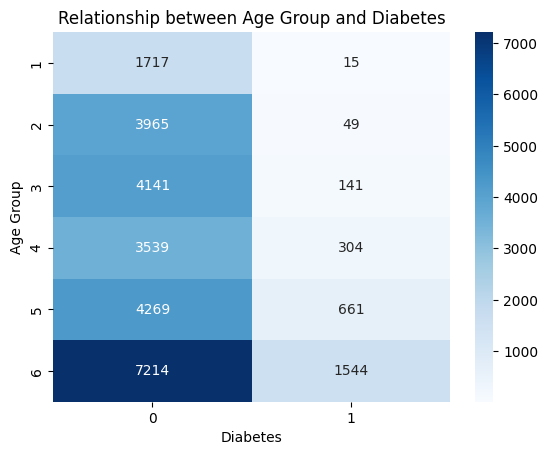

In [ ]:
# relationship between Age and Diabetes
import matplotlib.pyplot as plt
import seaborn as sns

cross_tab = pd.crosstab(df['Age_Group'], df['Diabetes'])

# Display the cross-tabulation
print(cross_tab)

# Plot a heatmap to visualize the relationship
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Relationship between Age Group and Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Age Group')
plt.show()

In [ ]:
percentage_diabetes = df.groupby('Age_Group')['Diabetes'].apply(lambda x: (x == 1).sum() / len(x) * 100)

# Display the result
for age_group, percentage in percentage_diabetes.items():
    print(f"Percentage of people having diabetes in Age Group {age_group} is {percentage:.2f}%")

Percentage of people having diabetes in Age Group 1 is 0.87%
Percentage of people having diabetes in Age Group 2 is 1.22%
Percentage of people having diabetes in Age Group 3 is 3.29%
Percentage of people having diabetes in Age Group 4 is 7.91%
Percentage of people having diabetes in Age Group 5 is 13.41%
Percentage of people having diabetes in Age Group 6 is 17.63%


There is a correlation between age group and diabetes risks. Older age group has higher diabetes rate. Therefore, I will keep the numerical variables.

### 4.1.2 Race


In [ ]:
# This is a categorical variable -> use OneHotEncoding

one_hot_encoded = pd.get_dummies(df['RACEALLP_A'], prefix='Race')

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27559 entries, 0 to 27650
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Diabetes      27559 non-null  int64
 1   AGEP_A        27559 non-null  int64
 2   RACEALLP_A    27559 non-null  int64
 3   SEX_A         27559 non-null  int64
 4   EDUCP_A       27559 non-null  int64
 5   BMICAT_A      27559 non-null  int64
 6   PHSTAT_A      27559 non-null  int64
 7   HYPEV_A       27559 non-null  int64
 8   CHLEV_A       27559 non-null  int64
 9   STREV_A       27559 non-null  int64
 10  MIEV_A        27559 non-null  int64
 11  CHDEV_A       27559 non-null  int64
 12  COPDEV_A      27559 non-null  int64
 13  LASTDR_A      27559 non-null  int64
 14  URGNT12MTC_A  27559 non-null  int64
 15  EMERG12MTC_A  27559 non-null  int64
 16  HOSPONGT_A    27559 non-null  int64
 17  RX12M_A       27559 non-null  int64
 18  MODFREQW_A    27559 non-null  int64
 19  EQUIP_A       27559 non-n

In [ ]:
# change column name
df.rename(columns={'Race_1':'Race_White','Race_2':'Race_Black','Race_3':'Race_Asian','Race_4':'Race_AIAN','Race_5':'Race_Mixed','Race_6':'Race_Others'},inplace=True)

# drop original Race column & race 7 8 9 (refuse to answer, unknown, ...)
df.drop(columns=['RACEALLP_A','Race_7','Race_8','Race_9'],inplace=True)

### 4.1.3 Gender


In [ ]:
# only include those disclosing their gender
df = df[(df['SEX_A']==2) | (df['SEX_A']==1)]

In [ ]:
# change from 1 Male 2 Female to 1 Male 0 Female
df.loc[df['SEX_A']==2,'SEX_A'] = 0

In [ ]:
# OneHotEncode Gender
one_hot_encoded = pd.get_dummies(df['SEX_A'], prefix='Sex')

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)

In [ ]:
# Change column name
df.rename(columns={'Sex_0':'Female','Sex_1':'Male'},inplace=True)

# Drop original Sex column
df.drop(columns=['SEX_A'],inplace=True)

### 4.1.4 Education

In [ ]:
# Exclude those refuse to disclose information

df = df[df['EDUCP_A']<11]

In [ ]:
# Education: originally has 11 groups. I reduce it to 2 groups: highschool and bachelor+

def education_group(edu):
    if edu >= 1 and edu <= 4:
        return 0
    else:
        return 1

# Apply the function to create the 'Education' column
df['Education'] = df['EDUCP_A'].apply(education_group)

In [ ]:
# change column name
df.rename(columns={'EDUCP_A':'Education'},inplace=True)

### 4.1.5 BMI

In [ ]:
# Exclude those unknown
df = df[df['BMICAT_A']!=9]

In [ ]:
percentage_diabetes = df.groupby('BMICAT_A')['Diabetes'].apply(lambda x: (x == 1).sum() / len(x) * 100)

# Display the result
for group, percentage in percentage_diabetes.items():
    print(f"Percentage of people having diabetes in BMI Group {group} is {percentage:.2f}%")

Percentage of people having diabetes in BMI Group 1 is 2.80%
Percentage of people having diabetes in BMI Group 2 is 4.65%
Percentage of people having diabetes in BMI Group 3 is 8.95%
Percentage of people having diabetes in BMI Group 4 is 16.19%


Since there is a correlation between BMI group and diabetes, I will keep it as it is.

In [ ]:
# change column name
df.rename(columns={'BMICAT_A':'BMI'},inplace=True)

## 4.2 Physical Health

### 4.2.1 General Health

In [ ]:
# Exclude those unknown
df = df[df['PHSTAT_A']<6]

In [ ]:
percentage_diabetes = df.groupby('PHSTAT_A')['Diabetes'].apply(lambda x: (x == 1).sum() / len(x) * 100)

# Display the result
for group, percentage in percentage_diabetes.items():
    print(f"Percentage of people having diabetes in group {group} is {percentage:.2f}%")

Percentage of people having diabetes in group 1 is 1.70%
Percentage of people having diabetes in group 2 is 4.76%
Percentage of people having diabetes in group 3 is 13.37%
Percentage of people having diabetes in group 4 is 23.09%
Percentage of people having diabetes in group 5 is 33.37%


Since there is a correlation between people's perceived health and diabetes, I will keep it as it is.

In [ ]:
# change column name
df.rename(columns={'PHSTAT_A':'Health'},inplace=True)

### 4.2.2 High Blood Pressure, High Cholesterol, Stroke, Heart Attack, Heart Disease, Chronic disorder

These columns are already categorical (1 = Yes, 2 = No). I only change it to 1 = Yes, 0 = No to match with other columns, and change column name.

In [ ]:
# rename
df.rename(columns={'HYPEV_A':'HighBP','CHLEV_A':'HighChol','STREV_A':'Stroke',
                   'MIEV_A':'HeartAttack','CHDEV_A':'HeartDisease','COPDEV_A':'ChronicDisease'},inplace=True)

In [ ]:
# change value
df.loc[df['HighBP']==2,'HighBP'] = 0
df.loc[df['HighChol']==2,'HighChol'] = 0
df.loc[df['Stroke']==2,'Stroke'] = 0
df.loc[df['HeartAttack']==2,'HeartAttack'] = 0
df.loc[df['HeartDisease']==2,'HeartDisease'] = 0
df.loc[df['ChronicDisease']==2,'ChronicDisease'] = 0

In [ ]:
# exclude those who do not disclose value
df = df[df['HighBP']<2]
df = df[df['HighChol']<2]
df = df[df['Stroke']<2]
df = df[df['HeartAttack']<2]
df = df[df['HeartDisease']<2]
df = df[df['ChronicDisease']<2]

## 4.3 Hospitalization Records


### 4.3.1 Last Doctor visit

In [ ]:
# Exclude those who do not disclose info

df = df[df['LASTDR_A']<7]

In [ ]:
# Original dataset has many groups. I group into 3 groups: Within 1 year, Within 2-4 years, More than 4 years

def visit(visit):
    if visit == 1:
        return 1
    elif visit > 1 and visit <= 4:
        return 2
    else:
        return 3

# Apply the function to create the 'Doctor Visit' column
df['Last_Doctor_Visit'] = df['LASTDR_A'].apply(visit)

In [ ]:
# Delete LASTDR_A col
df.drop(columns=['LASTDR_A'],inplace=True)

In [ ]:
percentage_diabetes = df.groupby('Last_Doctor_Visit')['Diabetes'].apply(lambda x: (x == 1).sum() / len(x) * 100)

# Display the result
for group, percentage in percentage_diabetes.items():
    print(f"Percentage of people having diabetes in group {group} is {percentage:.2f}%")

Percentage of people having diabetes in group 1 is 11.08%
Percentage of people having diabetes in group 2 is 2.13%
Percentage of people having diabetes in group 3 is 1.48%


There seems to be a correlation. I will keep it as it is.

### 4.3.2 Last Urgent Care visit

In [ ]:
# exclude those who do not disclose
df = df[df['URGNT12MTC_A']<7]

In [ ]:
# rename
df.rename(columns={'URGNT12MTC_A':'UrgentCare'},inplace=True)

This is numerical variables (number of times visit urgent care). I keep it as it is.

### 4.3.3 Emergency

In [ ]:
# exclude those who do not disclose
df = df[df['EMERG12MTC_A']<5]

In [ ]:
# rename
df.rename(columns={'EMERG12MTC_A':'Emergency'},inplace=True)

This is numerical variables. I keet it as it is.

### 4.3.4 Hospitalized and Prescription
These two columns contain 1 = Yes and 2 = No. As above, I rename column, change to 1 and 0, and exclude those who do not disclose info.

In [ ]:
# rename
df.rename(columns={'HOSPONGT_A':'Hospitalized','RX12M_A':'Prescription'},inplace=True)

In [ ]:
# change value
df.loc[df['Hospitalized']==2,'Hospitalized'] = 0
df.loc[df['Prescription']==2,'Prescription'] = 0

In [ ]:
# exclude
df = df[df['Hospitalized']<2]
df = df[df['Prescription']<2]

## 4.4 Habits

### 4.4.1 Exercise Frequency

In [ ]:
# rename
df.rename(columns={'MODFREQW_A':'Exercise'},inplace=True)

In [ ]:
# exclude those not disclose
df = df[df['Exercise']<97]

In [ ]:
# Original dataset has many groups. I group into 3 groups: less than once per week, 1-7 times/week, more

def exercise(times):
    if times == 0 or times == 96:
        return 1
    elif times > 0 and times <= 7:
        return 2
    else:
        return 3

# Apply the function to create the 'Doctor Visit' column
df['Exercise'] = df['Exercise'].apply(exercise)

In [ ]:
percentage_diabetes = df.groupby('Exercise')['Diabetes'].apply(lambda x: (x == 1).sum() / len(x) * 100)

# Display the result
for group, percentage in percentage_diabetes.items():
    print(f"Percentage of people having diabetes in group {group} is {percentage:.2f}%")

Percentage of people having diabetes in group 1 is 13.99%
Percentage of people having diabetes in group 2 is 7.07%
Percentage of people having diabetes in group 3 is 14.79%


There is no linear relation between exercise times and diabetes. I will use OneHotEncoding.

In [ ]:
one_hot_encoded = pd.get_dummies(df['Exercise'], prefix='Exercise')

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)

In [ ]:
# drop original col
df.drop(columns=['Exercise'],inplace=True)

# rename new col
df.rename(columns={'Exercise_1':'Exercise_Low','Exercise_2':'Exercise_Moderate','Exercise_3':'Exercise_Frequent'},inplace=True)

### 4.4.2 Equipment

In [ ]:
# change column name
df.rename(columns={'EQUIP_A':'Equipment_Walk'},inplace=True)

# exclude those do not disclose
df = df[df['Equipment_Walk']<3]

# change 1 Yes 2 No to 1 Yes 0 No
df.loc[df['Equipment_Walk']==2,'Equipment_Walk'] = 0

### 4.4.3 Smoking

In [ ]:
# change column name
df.rename(columns={'SMKEV_A':'Smoke'},inplace=True)

# exclude those do not disclose
df = df[df['Smoke']<3]

# change 1 Yes 2 No to 1 Yes 0 No
df.loc[df['Smoke']==2,'Smoke'] = 0

4.4.4 Drink Alcohol

In [ ]:
# change column name
df.rename(columns={'DRKLIFE_A':'Alcohol'},inplace=True)

# change 1 Yes 2 No to 1 Yes 0 No
df.loc[df['Alcohol']==2,'Alcohol'] = 0

4.4.5 Drinking Soda

In [ ]:
# change column name
df.rename(columns={'SODATP_A':'Soda'},inplace=True)

# exclude those who don't disclose
df = df[df['Soda']<4]

In [ ]:
percentage_diabetes = df.groupby('Soda')['Diabetes'].apply(lambda x: (x == 1).sum() / len(x) * 100)

# Display the result
for group, percentage in percentage_diabetes.items():
    print(f"Percentage of people having diabetes in group {group} is {percentage:.2f}%")

Percentage of people having diabetes in group 0 is 12.13%
Percentage of people having diabetes in group 1 is 8.44%
Percentage of people having diabetes in group 2 is 6.81%
Percentage of people having diabetes in group 3 is 7.24%


There is no linear relation. I will one hot encode it.

In [ ]:
one_hot_encoded = pd.get_dummies(df['Soda'], prefix='Soda')

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)

In [ ]:
# drop original col
df.drop(columns=['Soda'],inplace=True)

In [ ]:
# rename new col
df.rename(columns={'Soda_0':'Soda_Never','Soda_1':'Soda_Daily','Soda_2':'Soda_Weekly','Soda_3':'Soda_Monthly'},inplace=True)

### 4.4.6 Energy Drink

In [ ]:
# similar to Soda
# change column name
df.rename(columns={'SPORDRTP_A':'EnergyDrink'},inplace=True)

# exclude those who don't disclose
df = df[df['EnergyDrink']<4]

# one hot encoded
one_hot_encoded = pd.get_dummies(df['EnergyDrink'], prefix='EnergyDrink')

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)

# drop original col
df.drop(columns=['EnergyDrink'],inplace=True)

# rename new col
df.rename(columns={'EnergyDrink_0':'EnergyDrink_Never','EnergyDrink_1':'EnergyDrink_Daily',
                   'EnergyDrink_2':'EnergyDrink_Weekly','EnergyDrink_3':'EnergyDrink_Monthly'},inplace=True)

### 4.4.7 Sweetened Drink

In [ ]:
# similar to Soda
# change column name
df.rename(columns={'FRTDRTP_A':'SweetDrink'},inplace=True)

# exclude those who don't disclose
df = df[df['SweetDrink']<4]

# one hot encoded
one_hot_encoded = pd.get_dummies(df['SweetDrink'], prefix='SweetDrink')

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)

# drop original col
df.drop(columns=['SweetDrink'],inplace=True)

# rename new col
df.rename(columns={'SweetDrink_0':'SweetDrink_Never','SweetDrink_1':'SweetDrink_Daily',
                   'SweetDrink_2':'SweetDrink_Weekly','SweetDrink_3':'SweetDrink_Monthly'},inplace=True)

### 4.4.8 Fruit

In [ ]:
# similar to Soda
# change column name
df.rename(columns={'FRUITTP_A':'Fruit'},inplace=True)

# exclude those who don't disclose
df = df[df['Fruit']<4]

# one hot encoded
one_hot_encoded = pd.get_dummies(df['Fruit'], prefix='Fruit')

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)

# drop original col
df.drop(columns=['Fruit'],inplace=True)

# rename new col
df.rename(columns={'Fruit_0':'Fruit_Never','Fruit_1':'Fruit_Daily',
                   'Fruit_2':'Fruit_Weekly','Fruit_3':'Fruit_Monthly'},inplace=True)

### 4.4.9 Salad

In [ ]:
# similar to Soda
# change column name
df.rename(columns={'SALADTP_A':'Salad'},inplace=True)

# exclude those who don't disclose
df = df[df['Salad']<4]

# one hot encoded
one_hot_encoded = pd.get_dummies(df['Salad'], prefix='Salad')

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)

# drop original col
df.drop(columns=['Salad'],inplace=True)

# rename new col
df.rename(columns={'Salad_0':'Salad_Never','Salad_1':'Salad_Daily',
                   'Salad_2':'Salad_Weekly','Salad_3':'Salad_Monthly'},inplace=True)

### 4.4.10 Sleep

In [ ]:
# exclude those who do not disclose info
df = df[df['SLPHOURS_A']<25]

# Original dataset has many groups. I group into 3 groups: Less than 6 hours/day, 6-9 hours/day, More than 9 hours/day

def sleep(hour):
    if hour >= 1 and hour < 6:
        return 1
    elif hour >= 6 and hour <= 9:
        return 2
    else:
        return 3

# Apply the function to create the 'Sleep' column
df['Sleep'] = df['SLPHOURS_A'].apply(sleep)

# Drop original column
df.drop(columns=['SLPHOURS_A'],inplace=True)

<ipython-input-67-ce5dc5a250ef>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sleep'] = df['SLPHOURS_A'].apply(sleep)
<ipython-input-67-ce5dc5a250ef>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['SLPHOURS_A'],inplace=True)


In [ ]:
percentage_diabetes = df.groupby('Sleep')['Diabetes'].apply(lambda x: (x == 1).sum() / len(x) * 100)

# Display the result
for group, percentage in percentage_diabetes.items():
    print(f"Percentage of people having diabetes in group {group} is {percentage:.2f}%")

Percentage of people having diabetes in group 1 is 13.46%
Percentage of people having diabetes in group 2 is 8.98%
Percentage of people having diabetes in group 3 is 18.49%


There is no correlation between Sleep hours and Diabetes. I will encode it.

In [ ]:
# one hot encoded
one_hot_encoded = pd.get_dummies(df['Sleep'], prefix='Sleep')

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)

# drop original col
df.drop(columns=['Sleep'],inplace=True)

# rename new col
df.rename(columns={'Sleep_1':'Sleep_6h','Sleep_2':'Sleep_6to9h',
                   'Sleep_3':'Sleep_9h'},inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25382 entries, 0 to 27650
Data columns (total 55 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Diabetes             25382 non-null  int64
 1   AGEP_A               25382 non-null  int64
 2   Education            25382 non-null  int64
 3   BMI                  25382 non-null  int64
 4   Health               25382 non-null  int64
 5   HighBP               25382 non-null  int64
 6   HighChol             25382 non-null  int64
 7   Stroke               25382 non-null  int64
 8   HeartAttack          25382 non-null  int64
 9   HeartDisease         25382 non-null  int64
 10  ChronicDisease       25382 non-null  int64
 11  UrgentCare           25382 non-null  int64
 12  Emergency            25382 non-null  int64
 13  Hospitalized         25382 non-null  int64
 14  Prescription         25382 non-null  int64
 15  Equipment_Walk       25382 non-null  int64
 16  Smoke                2

After data preprocessing, we now have 1 output variables, 54 input variables. Total 25382 rows. If you find the dataset too large and computationally expensive, you can use SelectKBest to do feature selection and reduce the number of features. I can help you with that too.

In [ ]:
df.isna().sum()

Diabetes               0
AGEP_A                 0
Education              0
BMI                    0
Health                 0
HighBP                 0
HighChol               0
Stroke                 0
HeartAttack            0
HeartDisease           0
ChronicDisease         0
UrgentCare             0
Emergency              0
Hospitalized           0
Prescription           0
Equipment_Walk         0
Smoke                  0
Alcohol                0
Age_Group              0
Race_White             0
Race_Black             0
Race_Asian             0
Race_AIAN              0
Race_Mixed             0
Race_Others            0
Female                 0
Male                   0
Education              0
Last_Doctor_Visit      0
Exercise_Low           0
Exercise_Moderate      0
Exercise_Frequent      0
Soda_Never             0
Soda_Daily             0
Soda_Weekly            0
Soda_Monthly           0
EnergyDrink_Never      0
EnergyDrink_Daily      0
EnergyDrink_Weekly     0
EnergyDrink_Monthly    0


In [ ]:
# Number of Diabetes vs Non-diabetes

len(df[df['Diabetes']==1])

2471

The number of Diabetes (true positives) is too small (9.7%). This can lead to low f1-score eventhough the model can achieve high accuracy. To prevent this problem, I will perform SMOTE to oversample the minority group (Diabetes). This method will undoubtedly decrease accuracy but not too much, while significantly improve f1-score. Therefore, we think using SMOTE is appropriate.

In [ ]:
# download the data

df.to_csv('clean_data_2.csv')

from google.colab import files
files.download('clean_data_2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Visualization

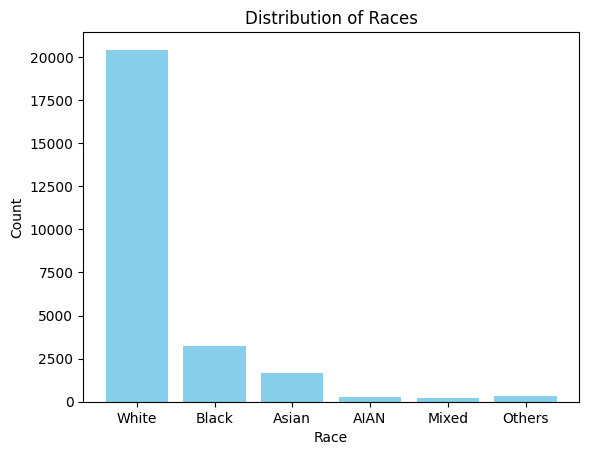

In [ ]:
column = ['Race_White', 'Race_Black', 'Race_Asian', 'Race_AIAN', 'Race_Mixed', 'Race_Others']

for col in column:
    plt.bar(df[col].name, df[col].sum(), color='skyblue')

plt.xlabel('Race')
plt.xticks(column, ['White','Black','Asian','AIAN','Mixed','Others'])
plt.ylabel('Count')
plt.title('Distribution of Races')
plt.show()

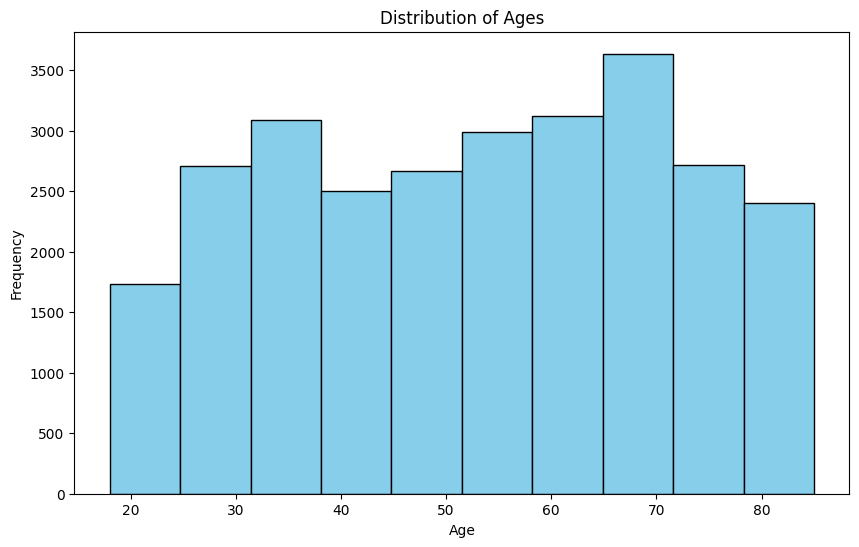

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.hist(df['AGEP_A'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages')
plt.show()

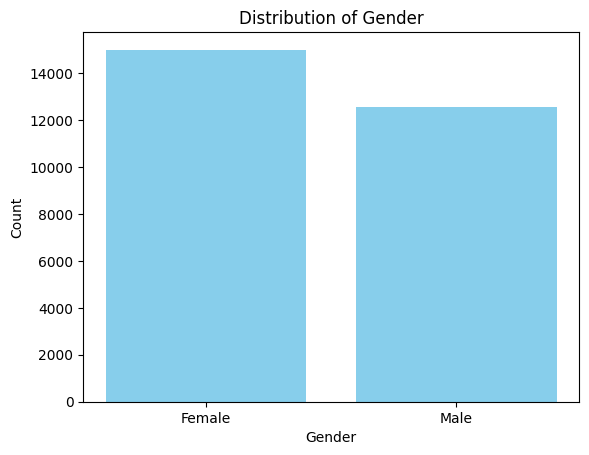

In [ ]:
column = ['Female','Male']

for col in column:
    plt.bar(df[col].name, df[col].sum(), color='skyblue')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()